In [1]:
from matplotlib import pyplot as plt

In [2]:
whole_sequence = 'Tom bought 4 apples and ate 2 . He now has 2'
tokens = whole_sequence.split()
input_len = 7
no_masks = 1
mask_pos = input_len
gap_len = 3
text_size_square = 20

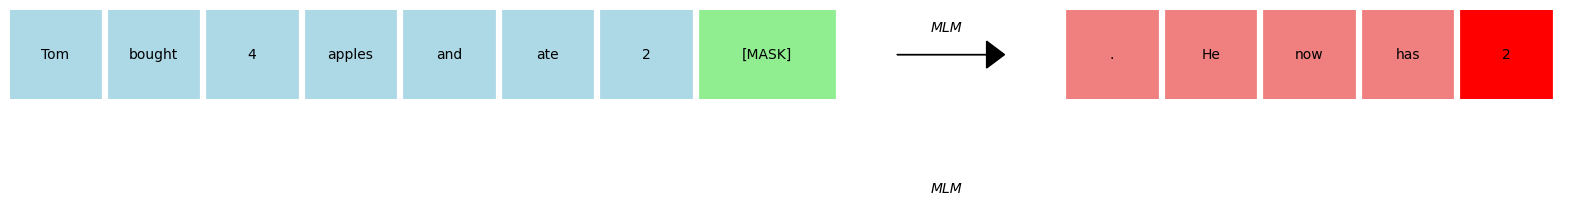

In [3]:
fig, axs[ax_id] = plt.subplots(figsize=(20, 2))

# Parameters for squares
size = 1  # Size of the square
spacing = 1.1  # Spacing between squares
# square_color = 'lightblue'
for i in range(len(tokens) + no_masks):
    # Calculate bottom left corner of each square
    x = i * (size + (spacing - 1) * size)
    if i == mask_pos:  # If the square is a mask square
        square_color = 'lightgreen'
        text = '[MASK]'
        square = plt.Rectangle((x, 0), 1.5*size, size, fill=True, color=square_color,  linewidth=2)
        axs[ax_id].text(x + size * 0.75, size/2, text, ha='center', va='center')
    elif i == no_masks + len(tokens) - 1:  # If the square is the last output square
        x += gap_len * size  # Add a gap between the input and output squares
        square_color = 'red'
        text = tokens[i - no_masks]
        square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
        axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center')
    elif i >= input_len + no_masks: # If the square is an output square
        x += gap_len * size  # Add a gap between the input and output squares
        square_color = 'lightcoral'
        text = tokens[i - no_masks]
        square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
        axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center')

    elif i < input_len + no_masks:  # If the square is an input square
        square_color = 'lightblue'
        text = tokens[i]
        square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color, linewidth=2)
        axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center')

    # Inside the loop, after adding the square patch
    axs[ax_id].add_patch(square)
axs[ax_id].arrow(input_len * spacing + no_masks * spacing * 1.5 + 0.5 * spacing, size/2, size, 0, head_width=0.3, head_length=0.2, fc='k', ec='k')
axs[ax_id].text(input_len * spacing + no_masks * spacing * 1.5 + spacing, size/2 + 0.3, 'MLM', ha='center', va='center', fontstyle='italic')

axs[ax_id].text(input_len * spacing + no_masks * spacing * 1.5 + spacing, -1, 'MLM', ha='center', va='center', fontstyle='italic')


# Set the axis limits to fit the squares and adjust for equal aspect ratio
plt.xlim(0, (len(tokens)+no_masks) * size * spacing + gap_len * size)
plt.ylim(0, size)
axs[ax_id].set_aspect('equal')

# Remove the axes for a cleaner look
axs[ax_id].axis('off')

plt.show()

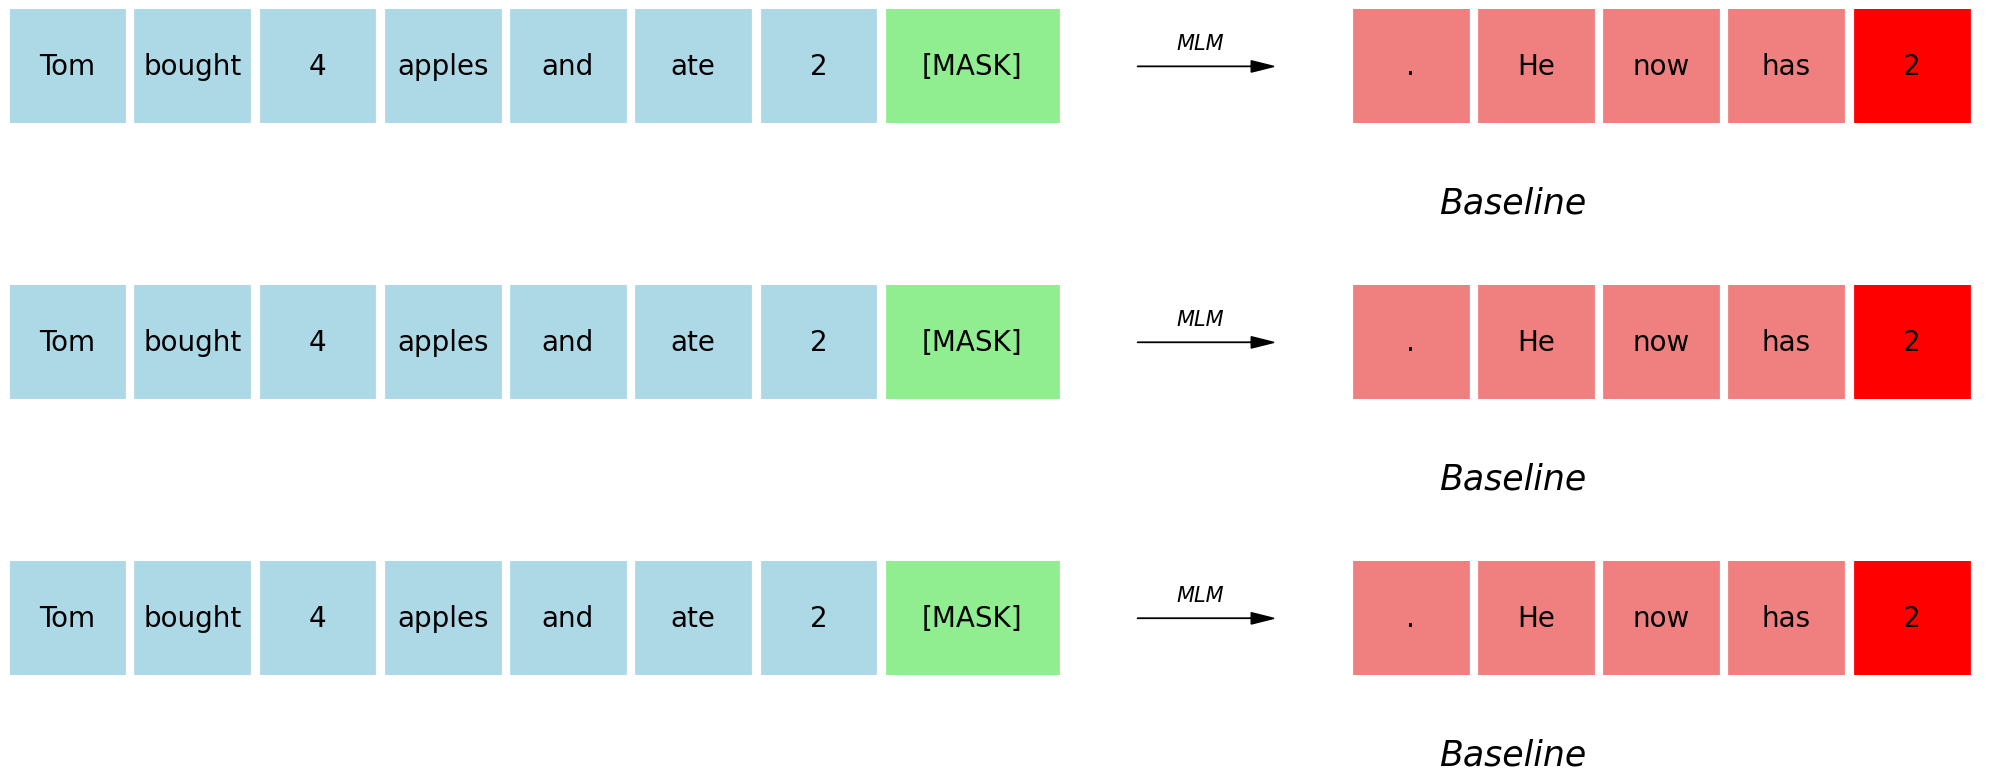

In [13]:
import matplotlib.pyplot as plts

fig, axs = plt.subplots(3, 1, figsize=(20, 9))  # Create two subplots vertically

for ax_id in range(3):  # Loop over the two axes
    # Parameters for squares
    size = 1  # Size of the square
    spacing = 1.1  # Spacing between squares

    for i in range(len(tokens) + no_masks):
        # Calculate bottom left corner of each square
        x = i * (size + (spacing - 1) * size)
        if i == mask_pos:  # If the square is a mask square
            square_color = 'lightgreen'
            text = '[MASK]'
            square = plt.Rectangle((x, 0), 1.5*size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size * 0.75, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i == no_masks + len(tokens) - 1:  # If the square is the last output square
            x += gap_len * size  # Add a gap between the input and output squares
            square_color = 'red'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i >= input_len + no_masks: # If the square is an output square
            x += gap_len * size  # Add a gap between the input and output squares
            square_color = 'lightcoral'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)

        elif i < input_len + no_masks:  # If the square is an input square
            square_color = 'lightblue'
            text = tokens[i]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color, linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)

        # Inside the loop, after adding the square patch
        axs[ax_id].add_patch(square)
    axs[ax_id].arrow(input_len * spacing + no_masks * spacing * 1.5 + 0.5 * spacing, size/2, size, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
    axs[ax_id].text(input_len * spacing + no_masks * spacing * 1.5 + spacing, size/2 + 0.2, 'MLM', ha='center', va='center', fontstyle='italic', fontsize=15)

    axs[ax_id].text(len(tokens) * spacing , -0.7, 'Baseline', ha='center', va='center', fontstyle='italic', fontsize=25)

    # Set the axis limits to fit the squares and adjust for equal aspect ratio
    axs[ax_id].set_xlim(0, (len(tokens)+no_masks) * size * spacing + gap_len * size)
    axs[ax_id].set_ylim(0, size)
    axs[ax_id].set_aspect('equal')

    # Remove the axes for a cleaner look
    axs[ax_id].axis('off')

plt.tight_layout()
plt.show()




In [5]:
tokens

['Tom',
 'bought',
 '4',
 'apples',
 'and',
 'ate',
 '2',
 '.',
 'He',
 'now',
 'has',
 '2']